<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [1]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

### PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [2]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

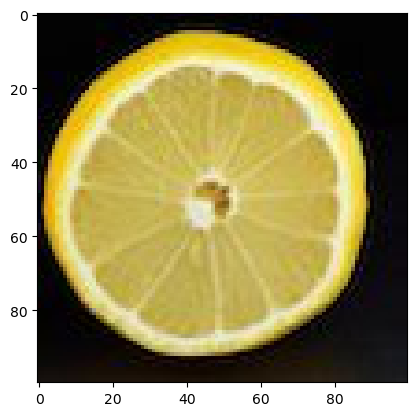

In [3]:
plt.imshow(image)
plt.show()

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





In [4]:
# Print the shape of the image
image.shape

(100, 100, 3)

In [5]:
# The last color of the image is selected and stored in img_single_channel
img_single_channel = image[:, :, -1]
img_single_channel

array([[ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       ...,
       [10, 10, 11, ..., 27, 27, 26],
       [12, 12, 13, ..., 29, 30, 28],
       [13, 14, 14, ..., 32, 33, 32]], dtype=uint8)

In [6]:
# Print the shape of img_single_channel has the same number of pixels as the original image
img_single_channel.shape

(100, 100)

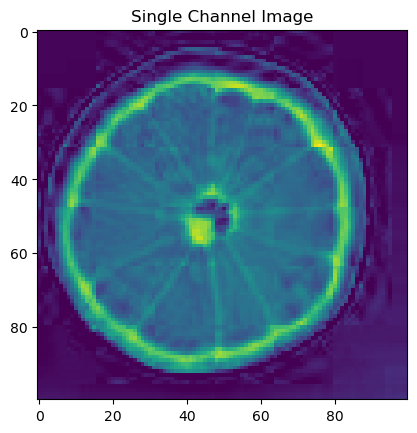

In [7]:
# Plot the image in single channel by using plt.imshow()
plt.imshow(img_single_channel)
plt.title('Single Channel Image')
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

In [8]:
#img_average_channel has the average of all 3 color channels of the image
img_average_channel = np.mean(image, axis=2)

In [9]:
img_average_channel

array([[ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ],
       ...,
       [13.66666667, 13.66666667, 14.66666667, ..., 25.66666667,
        25.66666667, 24.66666667],
       [15.66666667, 15.66666667, 16.66666667, ..., 27.66666667,
        28.66666667, 26.66666667],
       [16.66666667, 17.66666667, 17.66666667, ..., 30.66666667,
        31.66666667, 30.66666667]])

In [10]:
#Print the shape of the average image channel has the same number of pixels as the original image
img_average_channel.shape

(100, 100)

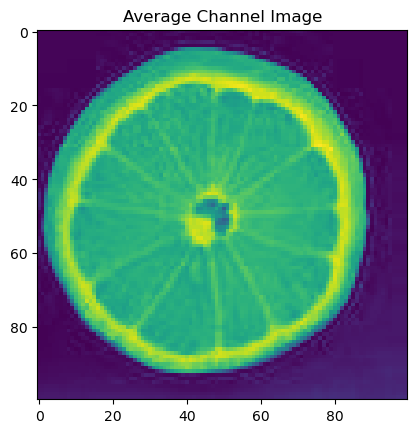

In [11]:
#Plot the average channel image using plt.imshow()
plt.imshow(img_average_channel)
plt.title('Average Channel Image')
plt.show()

### Differences between image from Part 1 and Part 2

The average channel image is better than the image from single channel image as in the single channel image only the last color channel is used to plot the image, therefore in this image the blue color is emphasized more.

The average channel image is plotted by taking into account the average color of all the 3 channels. So this method removes color variations and simplifies the image. 


## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

## Describe Identity matrix: 

An identity matrix is a square matrix which contains 1 as its diagonal element and all the other entries are 0.

In [12]:
# Define the size of the identity matrix (same as img_average_channel)
matrix_size = img_average_channel.shape

# Create the identity matrix using numpy
identity_matrix = np.eye(matrix_size[0], matrix_size[1])

In [13]:
# Print a random row from identity_matrix
random_row_index = np.random.randint(matrix_size[0])
random_row = identity_matrix[random_row_index, :]
random_row

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

The random row consists only a single 1 as its diagonal element while the rest of the elements are 0. So we have created an identity matrix which contains 1 as diagonal elements are rest of the elements are 0.

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [14]:
#Find the number of rows in image
N = img_average_channel[0].size 

#Create numpy array of size N  
arrayN = np.arange(N)
arrayN.size

100

In [15]:
#Shuffle the indices of arrayN
np.random.shuffle(arrayN)

In [16]:
#Call the shuffled indices rows and print the rows
rows = arrayN
rows

array([77, 42, 31, 41, 40, 76, 92, 14,  0, 50, 56, 61, 81, 65, 29, 85, 38,
       55, 20, 69,  1, 11, 49, 68, 48, 46, 53, 19, 54, 70, 45, 35, 17,  8,
       71, 95, 74, 47,  5, 13, 86, 12, 89, 98, 30,  4, 32, 18, 27, 43, 34,
       26, 80, 23, 88, 25, 82, 78, 60,  7, 33, 52, 96, 62, 63, 58, 66, 75,
       72, 90, 21, 59,  9, 93, 24, 57, 44,  3,  2, 87, 83, 91, 94, 51, 39,
        6, 28, 79, 22, 64, 36, 67, 73, 10, 15, 37, 97, 99, 84, 16])

## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [17]:
#Create matrix T equal to identity matrix but shuffling its row sequence according to the row array we created
T = identity_matrix[rows]

T is making use of the same elements of the identity matrix that we created in part 3 only the order of the rows in the identity matrix has been changed according to the random rows that we have generated in part 4.

In [18]:
#Verify the shape of T, identity matrix and img_average_channel to be equal
print(T.shape)
print(identity_matrix.shape)
print(img_average_channel.shape)

(100, 100)
(100, 100)
(100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

In [19]:
#Multiply matrix T and img_average_channel
transformed_image = np.matmul(T, img_average_channel)

In [20]:
#Check the shape of transformed_image
transformed_image.shape

(100, 100)

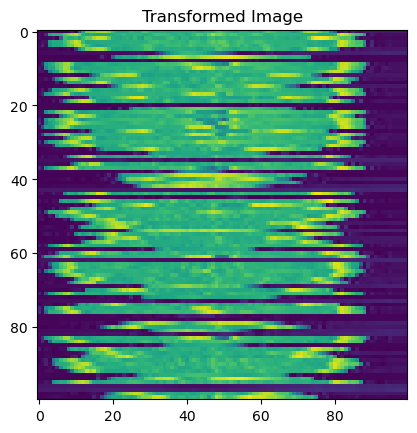

In [21]:
#Plot transformed image
plt.imshow(transformed_image)
plt.title('Transformed Image')
plt.show()

Matrix T has reordered the rows in which the identity matrix was represented. And we multiplied matrix T with the average channel matrix, which gave result to a distorted image due to the shuffled rows in the matrix. Each dot product is taking the row from img_average channel and plotting it in transformed image according to the sequence specified in rows.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

In [22]:
# To check if the matrix is invertible we can check by calculating its determinant 
# The matrix is invertible if its determinant is 0
# Calculate the determinant of matrix T
determinant_T = np.linalg.det(T)

In [23]:
# Check if T is determinant is non-zero
if determinant_T != 0:
    print("Matrix T is invertible.")
else:
    print("Matrix T is not invertible.")

Matrix T is invertible.


In [24]:
# Compute the inverse of matrix T
Tinv = np.linalg.inv(T)

In [25]:
# Check the shape of Tinv
Tinv.shape

(100, 100)

In [26]:
#Retrieve the image by multiplying the inverse of matrix T with the transformed image
retrieve_image = np.matmul(Tinv, transformed_image)

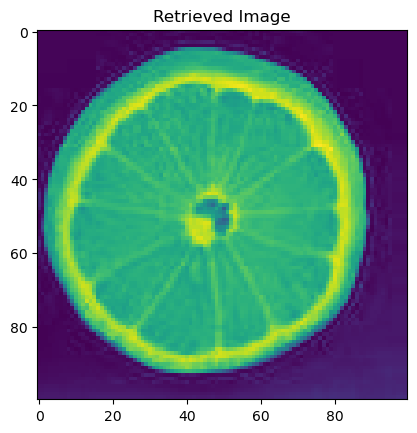

In [27]:
#Plot retrieved image
plt.imshow(retrieve_image)
plt.title('Retrieved Image')
plt.show()

From the retrieved image we can see that it matches the original image.

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


In [28]:
image.shape

(100, 100, 3)

In [29]:
#To perform the same operations on the rows of image we can transpose the image to get the image with columns
transposed_image = np.transpose(image, (1, 0, 2))
transposed_image.shape

(100, 100, 3)

In [30]:
#Find the number of columns in image
M = transposed_image.shape[1]

#Create numpy array of size M
arrayM = np.arange(M)
arrayM.size

100

In [31]:
#Shuffle the indices of arrayM
np.random.shuffle(arrayM)

In [32]:
#Call the shuffled indices cols and print the cols
cols = arrayM
cols

array([33, 23, 69, 78, 55, 95, 56, 90, 27, 62, 28, 63, 64, 36,  9, 92, 22,
       30, 43, 53, 17, 51, 21, 60, 35, 11, 18, 67, 25, 97, 49, 20, 12, 85,
       93, 73,  4, 54,  0, 87, 83,  3,  1, 89, 84, 47, 94, 41, 37, 45, 40,
       77, 79, 82, 26, 29,  2,  7, 75, 24, 50, 38, 68, 14, 10, 32, 96, 42,
       46,  6,  8, 44, 99, 39, 31, 65, 98, 61, 34, 16, 76, 52, 19, 15, 13,
       59, 81, 91, 74, 88, 86, 80, 58, 71, 72,  5, 48, 70, 66, 57])

In [33]:
# Define the size of the identity matrix (same as transposed_image)
matrix_size = transposed_image.shape

# Create the identity matrix using numpy
identity_matrix2 = np.eye(matrix_size[0], matrix_size[1])

In [34]:
matrix_size

(100, 100, 3)

In [35]:
identity_matrix2.shape

(100, 100)

In [36]:
#Create matrix Q equal to identity matrix but shuffling its column sequence according to the colums array we created
Q = identity_matrix2[cols]

In [37]:
Q[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
#Multiply matrix Q and transposed_image
transformed_image2 = np.matmul(Q, transposed_image)

#Check the shape of transformed_image
transformed_image2.shape

(100, 100, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


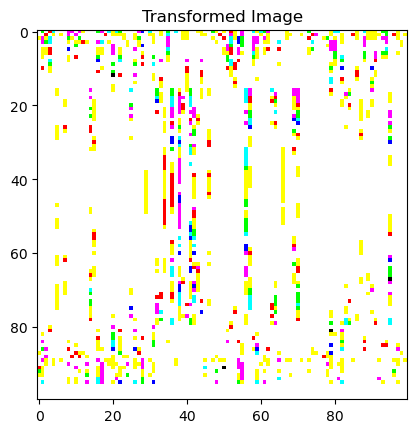

In [39]:
#Plot transformed image
plt.imshow(transformed_image2)
plt.title('Transformed Image')
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

In [40]:
#Find the number of columns in image
N,M,_ = transposed_image.shape

#Create numpy array of size M
arrayN = np.arange(N)
arrayM.size

#Create numpy array of size M
arrayM = np.arange(M)
arrayM.size

100

In [41]:
#Shuffle the indices of arrayN, arrayM
rows = np.random.shuffle(arrayN)
cols = np.random.shuffle(arrayM)

In [42]:
identity_matrix_row = np.eye(N)
identity_matrix_col = np.eye(M)

In [43]:
T = identity_matrix_row[rows]
Q = identity_matrix_col[cols]

In [44]:
transposed_image.shape

(100, 100, 3)

In [45]:
transposed_image = Image.fromarray(transposed_image)

In [46]:
reshaped_transposed_image = transposed_image.resize((100, 100))

In [47]:
reshaped_transposed_image = np.array(reshaped_transposed_image)

In [48]:
reshaped_transposed_image.shape

(100, 100, 3)

In [49]:
scrambled_image = np.matmul(T, transposed_image)

In [50]:
scrambled_image.shape

(100, 100, 3)

In [51]:
Q = Q.reshape(100,100)

In [52]:
Q.shape

(100, 100)

In [53]:
scrambled_image = np.matmul(Q, scrambled_image)

In [54]:
scrambled_image.shape

(100, 100, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


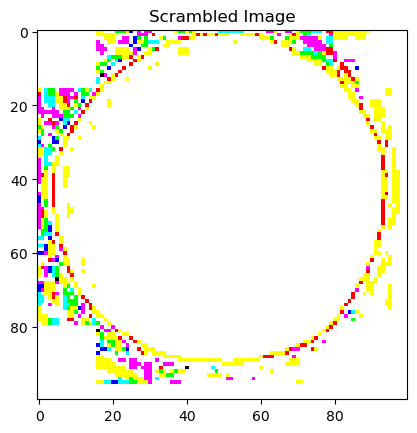

In [55]:
#Plot scrambled image
plt.imshow(scrambled_image)
plt.title('Scrambled Image')
plt.show()

In [56]:
determinant_Q = np.linalg.det(Q)
determinant_Q

1.0

In [57]:
# Compute the inverse of matrix T
Tinv = np.linalg.inv(T)

# Compute the inverse of matrix Q
Qinv = np.linalg.inv(Q)

In [58]:
#Retrieve the image by multiplying the inverse of matrix T  and matrix Q with the scrambled image
original_image = np.matmul(Tinv, scrambled_image)

In [59]:
original_image = np.matmul(Qinv, original_image)

In [60]:
original_image = np.transpose(original_image, (1, 0, 2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


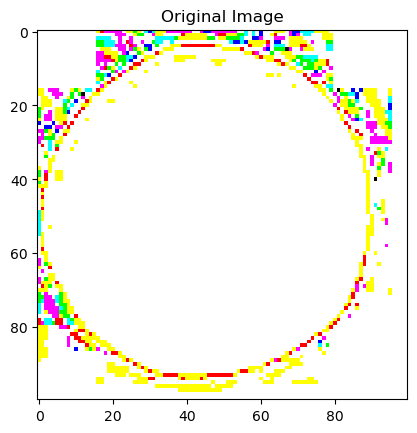

In [61]:
#Plot transformed image
plt.imshow(original_image)
plt.title('Original Image')
plt.show()